In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import svm
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
data = pd.read_csv('healthcare_dataset.csv',encoding="iso-8859-1")

## Data Description: 

## Healthcare Dataset¶

This dataset contains information about patients admitted to a hospital, including demographic details, medical conditions, treatments, and billing information. The dataset comprises the following columns:

<b>Name</b>: Names of the patients admitted to the hospital.

<b>Age</b>: Age of the patients at the time of admission.

<b>Gender</b>: Gender of the patients (e.g., male, female).

<b>Blood Type</b>: Blood type of the patients.

<b>Medical Condition</b>: Description of the medical condition or diagnosis for which the patient is admitted.

<b>Date of Admission</b>: Date when the patient was admitted to the hospital.

<b>Doctor</b>: Name or identifier of the doctor responsible for the patient's care.

<b>Hospital</b>: Name or identifier of the hospital where the patient is admitted.

<b>Insurance Provider</b>: Name of the insurance provider covering the patient's medical expenses.

<b>Billing Amount</b>: Amount billed to the patient or their insurance provider for medical services received during the hospital stay.

<b>Room Number</b>: Identifier of the room where the patient is accommodated.

<b>Admission Type</b>: Type of admission, such as emergency, elective, or transfer.

<b>Discharge Date</b>: Date when the patient was discharged from the hospital.

<b>Medication</b>: List of medications prescribed to the patient during their hospitalization.

<b>Test Results</b>: Results of medical tests conducted on the patient during their hospital stay.

This dataset provides valuable insights into patient demographics, medical conditions, treatment patterns, and hospital operations. It can be used for various analyses, including patient outcome prediction, resource allocation optimization, and healthcare quality improvement initiatives.



## EDA

In [3]:
data.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [4]:
data.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306          328         Urgent     2024-02-02  Paracetamol   
1    33643.327287          265      Emergency     2019-08-26    Ibuprofen   
2    27955.096079          205      Emergency     2022-10-07      Aspirin   
3    37909.782410          450       Elective     2020-12-18    Ibuprofen   
4    14238.317814          458         Urgent     2022-10-09   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

In [5]:
data.tail(10)

Name  Age  Gender Blood Type Medical Condition  \
55490   STepHAniE oliVer   82    Male         B-            Cancer   
55491      lInDA grIFfin   47  Female         O+           Obesity   
55492   LAuREn MCcormIcK   51    Male         O+         Arthritis   
55493       gLoRIA BOWen   57  Female         B-         Arthritis   
55494      JEssIcA WHiTe   67    Male         O+         Arthritis   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission           Doctor                      Hospital  \
55490        2022-01-10     Gary Leblanc                     Group Lee   
55491        2020-06-21   Danielle Davis      and King Jordan Johnson,   
55492        2020-12-06     Kevin Flores                   Inc Barnett   
55493        2022-07-23   Lucas Thompson                Group Gonzalez   
55494        2023-12-11     Jesus Jordan                 Miller-Harris   
55495        2020-08-16    Joshua Jarvis                Jones-Thompson   
55496        2020-01-23  Taylor Sullivan                  Tucker-Moyer   
55497        2020-07-13   Joe Jacobs DVM  and Mahoney Johnson Vasquez,   
55498        2019-05-25   Kimberly Curry      Jackson Todd and Castro,   
55499        2024-04-02    Dennis Warren                Henry Sons and   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
55490              Cigna    17350.543524          381      Emergency   
55491              Aetna    15715.551079          310      Emergency   
55492              Cigna     2588.150832          289      Emergency   
55493           Medicare     3954.853764          463      Emergency   
55494           Medicare    42535.301234          378      Emergency   
55495         Blue Cross     2650.714952          417       Elective   
55496              Cigna    31457.797307          316       Elective   
55497   UnitedHealthcare    27620.764717          347         Urgent   
55498           Medicare    32451.092358          321       Elective   
55499              Aetna     4010.134172          448         Urgent   

      Discharge Date   Medication Test Results  
55490     2022-01-21   Penicillin     Abnormal  
55491     2020-06-25      Lipitor     Abnormal  
55492     2020-12-12  Paracetamol       Normal  
55493     2022-08-18      Aspirin     Abnormal  
55494     2024-01-04    Ibuprofen       Normal  
55495     2020-09-15   Penicillin     Abnormal  
55496     2020-02-01      Aspirin       Normal  
55497     2020-08-10    Ibuprofen     Abnormal  
55498     2019-05-31    Ibuprofen     Abnormal  
55499     2024-04-29    Ibuprofen     Abnormal

In [6]:
data.shape

(55500, 15)

In [7]:
print("Number of Rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of Rows 55500
Number of columns 15


In [8]:
data.info

<bound method DataFrame.info of                     Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith           

In [9]:
dup_data=data.duplicated().any()

In [10]:
print("Are there any duplicated values in the data",dup_data)

Are there any duplicated values in the data True


In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(54966, 15)

In [13]:
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [14]:
data.describe()

Age  Billing Amount   Room Number
count  54966.000000    54966.000000  54966.000000
mean      51.535185    25544.306284    301.124404
std       19.605661    14208.409711    115.223143
min       13.000000    -2008.492140    101.000000
25%       35.000000    13243.718641    202.000000
50%       52.000000    25542.749145    302.000000
75%       68.000000    37819.858159    401.000000
max       89.000000    52764.276736    500.000000

In [15]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [16]:
numerical_summary = data[['Age', 'Billing Amount', 'Room Number']].describe()
numerical_summary

Age  Billing Amount   Room Number
count  54966.000000    54966.000000  54966.000000
mean      51.535185    25544.306284    301.124404
std       19.605661    14208.409711    115.223143
min       13.000000    -2008.492140    101.000000
25%       35.000000    13243.718641    202.000000
50%       52.000000    25542.749145    302.000000
75%       68.000000    37819.858159    401.000000
max       89.000000    52764.276736    500.000000

## Converted Date Columns and Calculate Length of Stay

In [17]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

# Calculate length of stay
data['Length of Stay'] = (data['Discharge Date'] - data['Date of Admission']).dt.days
data.head()


/var/folders/z5/mf0v461d1f578jlw6kng364r0000gn/T/ipykernel_8521/3541755061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
/var/folders/z5/mf0v461d1f578jlw6kng364r0000gn/T/ipykernel_8521/3541755061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])
/var/folders/z5/mf0v461d1f578jlw6kng364r0000gn/T/ipykernel_8521/3541755061.py:5: SettingWithCopyWarning: 
A value is trying 

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306          328         Urgent     2024-02-02  Paracetamol   
1    33643.327287          265      Emergency     2019-08-26    Ibuprofen   
2    27955.096079          205      Emergency     2022-10-07      Aspirin   
3    37909.782410          450       Elective     2020-12-18    Ibuprofen   
4    14238.317814          458         Urgent     2022-10-09   Penicillin   

   Test Results  Length of Stay  
0        Normal               2  
1  Inconclusive               6  
2        Normal              15  
3      Abnormal              30  
4      Abnormal              20

## Create Readmission Indicator

In [18]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

data = data.sort_values(by=['Name', 'Date of Admission']).reset_index(drop=True)

data['Readmitted within 30 Days'] = False

for i in range(1, len(data)):
    if (data.iloc[i]['Name'] == data.iloc[i - 1]['Name'] and
        (data.iloc[i]['Date of Admission'] - data.iloc[i - 1]['Discharge Date']).days <= 30):
        data.at[i, 'Readmitted within 30 Days'] = True

# Display the updated dataframe
print(data.head())


/var/folders/z5/mf0v461d1f578jlw6kng364r0000gn/T/ipykernel_8521/1808898989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
/var/folders/z5/mf0v461d1f578jlw6kng364r0000gn/T/ipykernel_8521/1808898989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])


                Name  Age  Gender Blood Type Medical Condition  \
0       AARON DuncAn   22    Male        AB-           Obesity   
1        AARON HicKS   76  Female         A+         Arthritis   
2  AARON bAldWIN Jr.   20    Male         O-      Hypertension   
3      AARON hAWkIns   69  Female         B-          Diabetes   
4         AAROn HaRt   18    Male         B-            Cancer   

  Date of Admission           Doctor                       Hospital  \
0        2019-07-24       Ryan Perry                     Welch-Yang   
1        2022-03-02   Michael Butler  Rasmussen Patrick and Newman,   
2        2020-10-10       Amy Farley     Flores Friedman and White,   
3        2019-10-17    Kimberly York  Harris, Hernandez and Vazquez   
4        2021-01-13  Sharon Morrison          Fox Guzman James, and   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0   UnitedHealthcare    39906.147308          279         Urgent   
1              Cigna    10584.185945    

##  Handle Missing Values and Categorical Data

In [20]:
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)
for column in data.select_dtypes(exclude=['object', 'datetime']).columns:
    data[column].fillna(data[column].median(), inplace=True)

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

data_encoded.head()

Age Date of Admission  Billing Amount  Room Number Discharge Date  \
0   22        2019-07-24    39906.147308          279     2019-08-04   
1   76        2022-03-02    10584.185945          187     2022-03-15   
2   20        2020-10-10    29740.960199          104     2020-11-05   
3   69        2019-10-17    21535.554758          206     2019-10-26   
4   18        2021-01-13    13895.551020          260     2021-01-20   

   Length of Stay  Readmitted within 30 Days  Name_AARON HicKS  \
0              11                      False                 0   
1              13                      False                 1   
2              26                      False                 0   
3               9                      False                 0   
4               7                      False                 0   

   Name_AARON bAldWIN Jr.  Name_AARON hAWkIns  ...  \
0                       0                   0  ...   
1                       0                   0  ...   
2                       1                   0  ...   
3                       0                   1  ...   
4                       0                   0  ...   

   Insurance Provider_Medicare  Insurance Provider_UnitedHealthcare  \
0                            0                                    1   
1                            0                                    0   
2                            1                                    0   
3                            0                                    0   
4                            0                                    0   

   Admission Type_Emergency  Admission Type_Urgent  Medication_Ibuprofen  \
0                         0                      1                     0   
1                         0                      0                     0   
2                         0                      1                     0   
3                         0                      1                     0   
4                         1                      0                     0   

   Medication_Lipitor  Medication_Paracetamol  Medication_Penicillin  \
0                   0                       1                      0   
1                   1                       0                      0   
2                   0                       1                      0   
3                   0                       0                      1   
4                   0                       1                      0   

   Test Results_Inconclusive  Test Results_Normal  
0                          0                    0  
1                          1                    0  
2                          0                    0  
3                          0                    0  
4                          0                    0  

[5 rows x 130238 columns]

## Gender Count

In [21]:
# Categorical columns
data['Gender'].value_counts()

Male      27496
Female    27470
Name: Gender, dtype: int64

## Admission Type Count

In [22]:
print(data['Admission Type'].value_counts())

Elective     18473
Urgent       18391
Emergency    18102
Name: Admission Type, dtype: int64


## Insurace Provider Count

In [23]:
print(data['Insurance Provider'].value_counts())

Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: Insurance Provider, dtype: int64


In [24]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Length of Stay',
       'Readmitted within 30 Days'],
      dtype='object')

/var/folders/z5/mf0v461d1f578jlw6kng364r0000gn/T/ipykernel_8521/2767110048.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



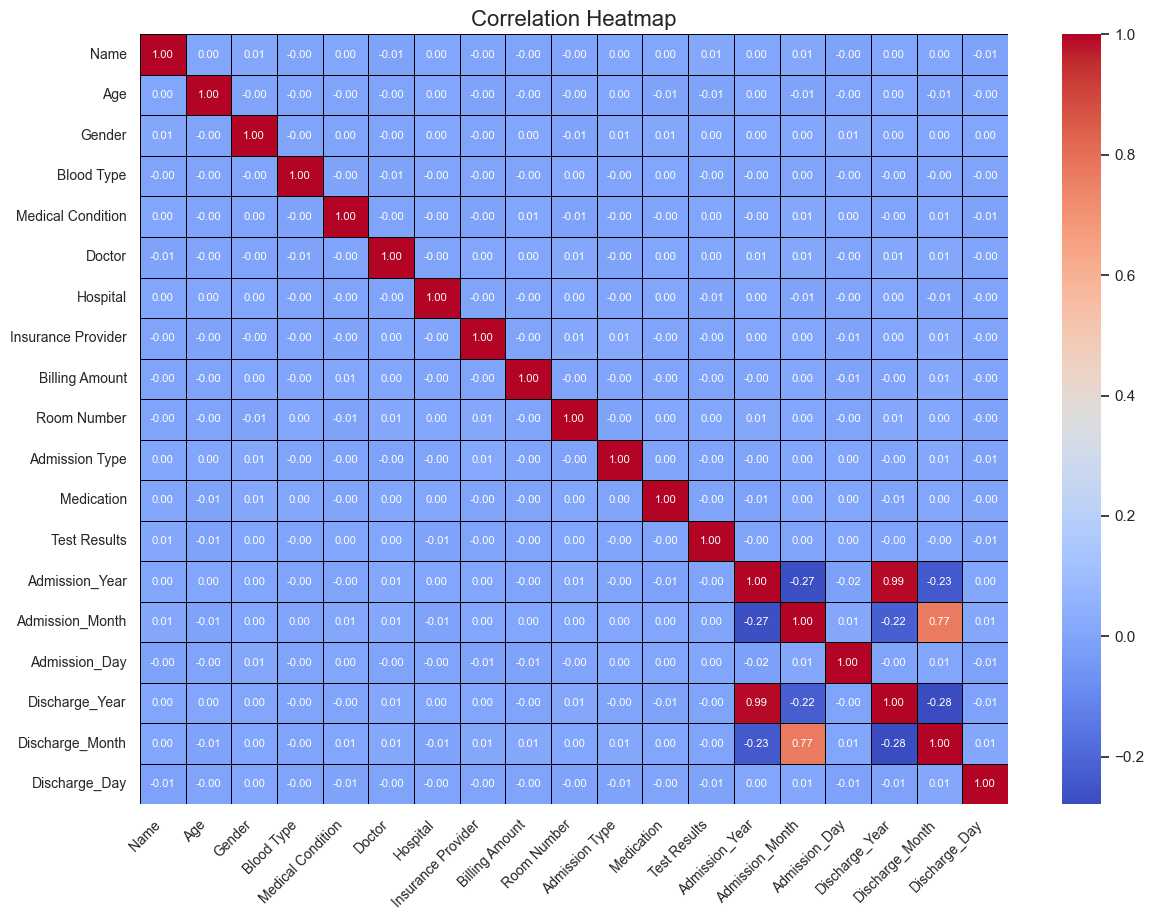

In [62]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plotting the heatmap with improved readability
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True,
            annot_kws={"size": 8}, linewidths=0.5, linecolor='black')

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Distribution of Age by Gender

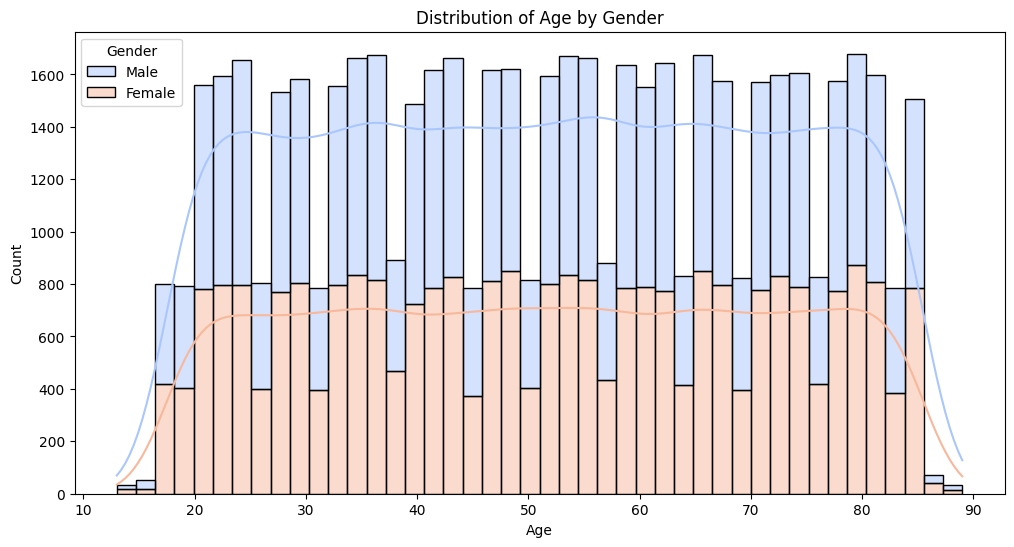

In [25]:
# Plot the distribution of Age by Gender
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Age', hue='Gender', multiple='stack', palette='coolwarm', kde=True)
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


## Count of patients by medical condition and gender

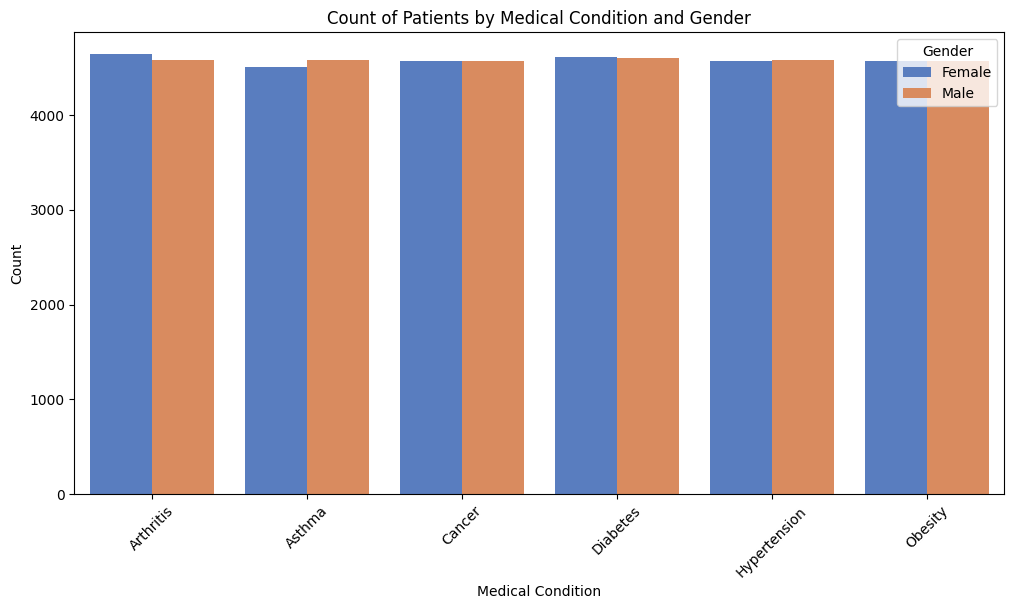

In [26]:
# Group by 'Medical Condition' and 'Gender' and calculate the count for each combination
condition_gender_count = data.groupby(['Medical Condition', 'Gender']).size().reset_index(name='Count')

# Plot the count of patients by medical condition and gender
plt.figure(figsize=(12, 6))
sns.barplot(x='Medical Condition', y='Count', hue='Gender', data=condition_gender_count, palette='muted')
plt.title('Count of Patients by Medical Condition and Gender')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Type of Medical condition accoridng to season

In [28]:
# Convert 'Date of Admission' to datetime format
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])

# Extract month and year from 'Date of Admission'
data['Month'] = data['Date of Admission'].dt.month
data['Year'] = data['Date of Admission'].dt.year

# Define a function to map months to seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create a 'Season' column
data['Season'] = data['Month'].apply(month_to_season)

# Group by season and calculate the number of admissions
seasonal_admissions = data.groupby(['Year', 'Month', 'Season']).size().reset_index(name='Count')

# Display the first few rows to verify the changes
print(seasonal_admissions.head())

   Year  Month  Season  Count
0  2019      5  Spring    677
1  2019      6  Summer    899
2  2019      7  Summer    951
3  2019      8  Summer    985
4  2019      9    Fall    924


## Monthly distribution of medical conditions

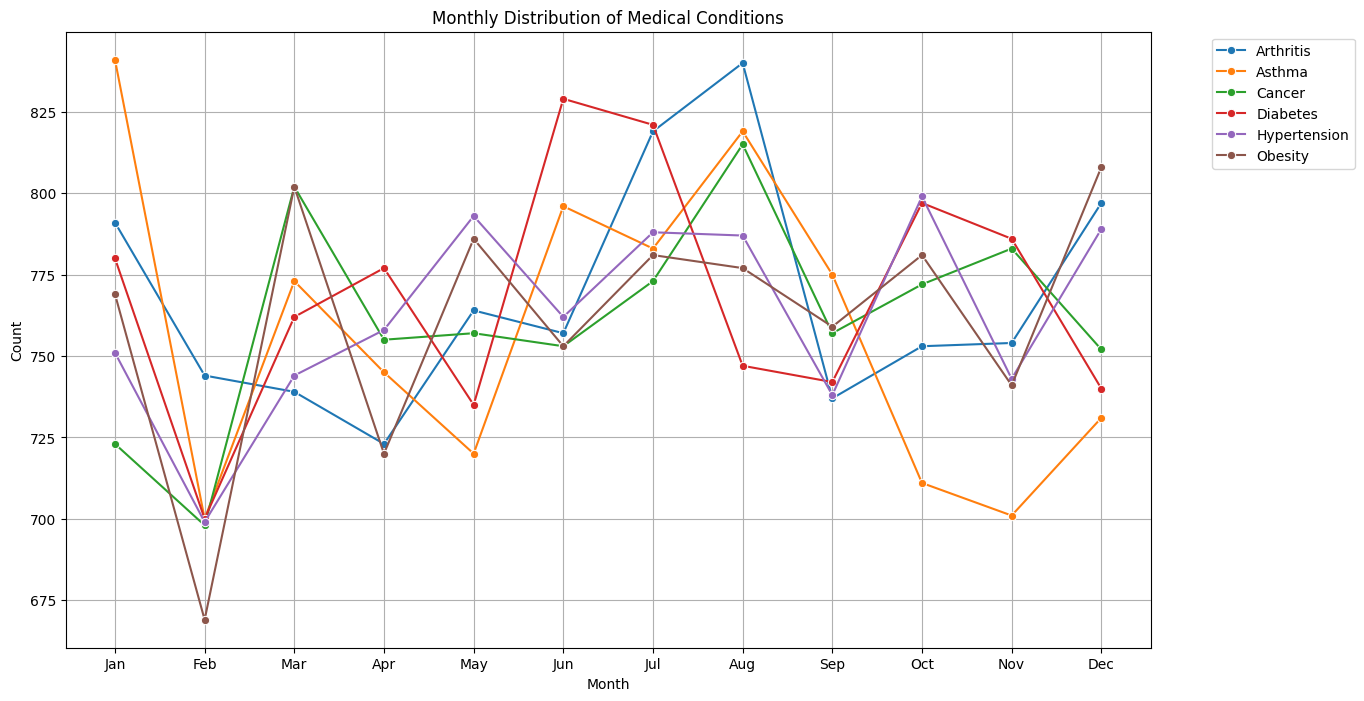

In [29]:
# Group by month and medical condition
monthly_conditions = data.groupby(['Month', 'Medical Condition']).size().reset_index(name='Count')

# Plot the monthly distribution of medical conditions
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Count', hue='Medical Condition', data=monthly_conditions, marker='o')
plt.title('Monthly Distribution of Medical Conditions')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


## Number of admissions by season

/var/folders/z5/mf0v461d1f578jlw6kng364r0000gn/T/ipykernel_8521/2083527892.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Count', data=seasonal_admissions, palette='coolwarm')


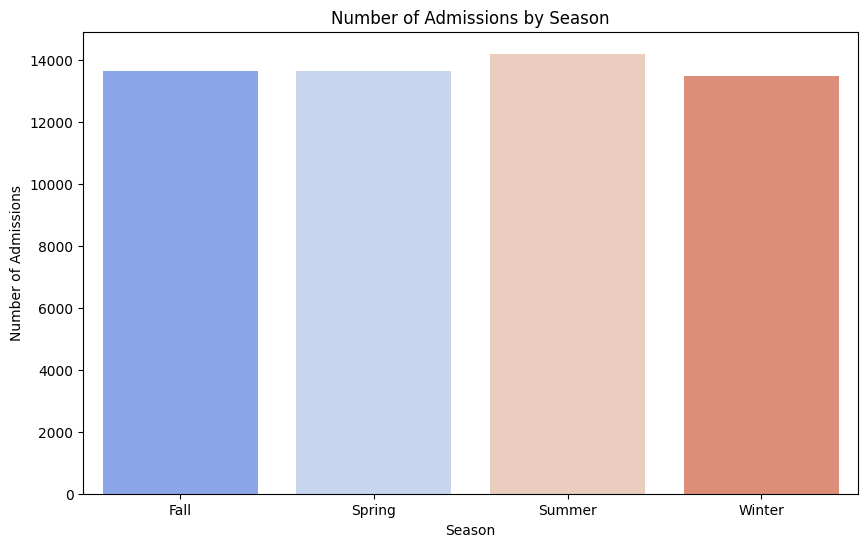

In [30]:
# Define a function to map months to seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create a 'Season' column
data['Season'] = data['Month'].apply(month_to_season)

# Group by season and calculate the number of admissions
seasonal_admissions = data.groupby('Season').size().reset_index(name='Count')

# Plot the number of admissions by season
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Count', data=seasonal_admissions, palette='coolwarm')
plt.title('Number of Admissions by Season')
plt.xlabel('Season')
plt.ylabel('Number of Admissions')
plt.show()


In [31]:
# Display the unique values in the 'Readmitted within 30 Days' column to understand its structure
print(data['Readmitted within 30 Days'].unique())

[False  True]


## Readmission rate by admission type

/var/folders/z5/mf0v461d1f578jlw6kng364r0000gn/T/ipykernel_8521/706019217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Admission Type', y='Readmission Rate', data=readmission_rate_admission, palette='viridis')


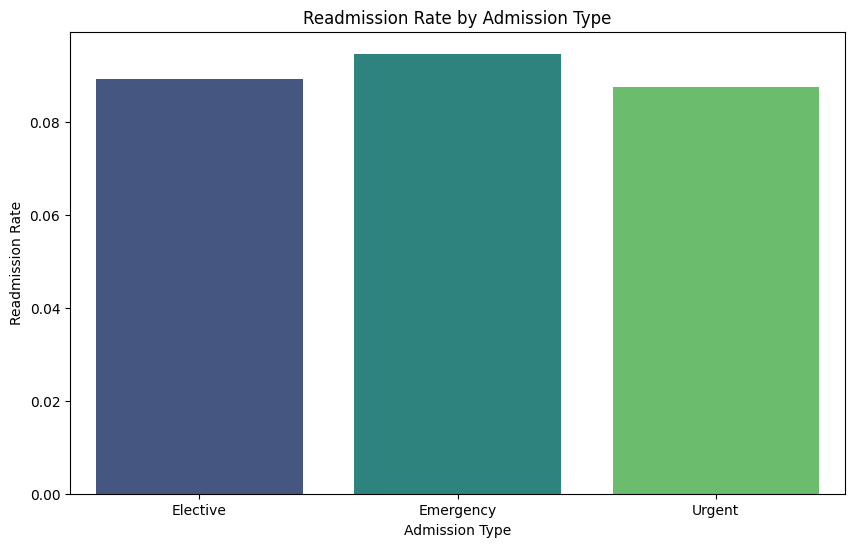

In [32]:

readmission_rate_admission = data.groupby('Admission Type')['Readmitted within 30 Days'].mean().reset_index(name='Readmission Rate')

plt.figure(figsize=(10, 6))
sns.barplot(x='Admission Type', y='Readmission Rate', data=readmission_rate_admission, palette='viridis')
plt.title('Readmission Rate by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Readmission Rate')
plt.show()


## Readmission rate by gender

/var/folders/z5/mf0v461d1f578jlw6kng364r0000gn/T/ipykernel_8521/2837491727.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Readmission Rate', data=readmission_rate_gender, palette='coolwarm')


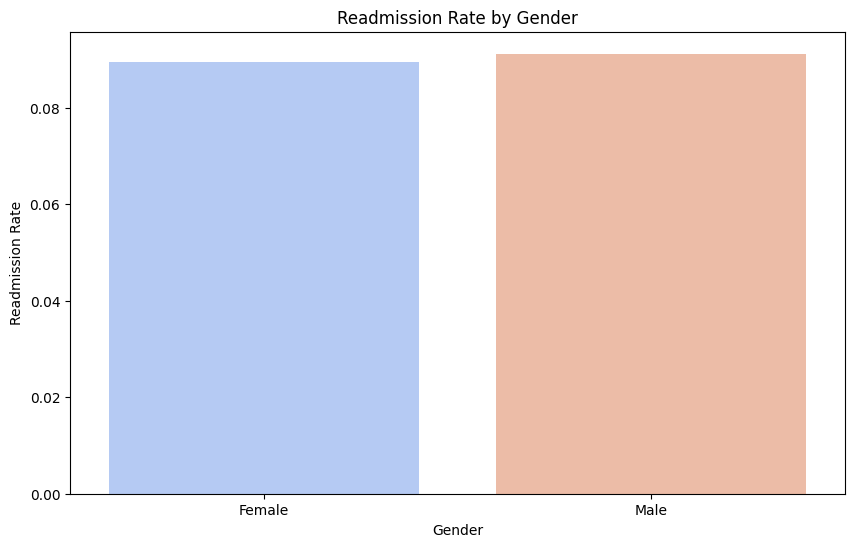

In [33]:
# Calculate the readmission rate by 'Gender'
readmission_rate_gender = data.groupby('Gender')['Readmitted within 30 Days'].mean().reset_index(name='Readmission Rate')
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Readmission Rate', data=readmission_rate_gender, palette='coolwarm')
plt.title('Readmission Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Readmission Rate')
plt.show()

## Readmission rate by medical condition

/var/folders/z5/mf0v461d1f578jlw6kng364r0000gn/T/ipykernel_8521/123652477.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medical Condition', y='Readmission Rate', data=readmission_rate_condition, palette='muted')


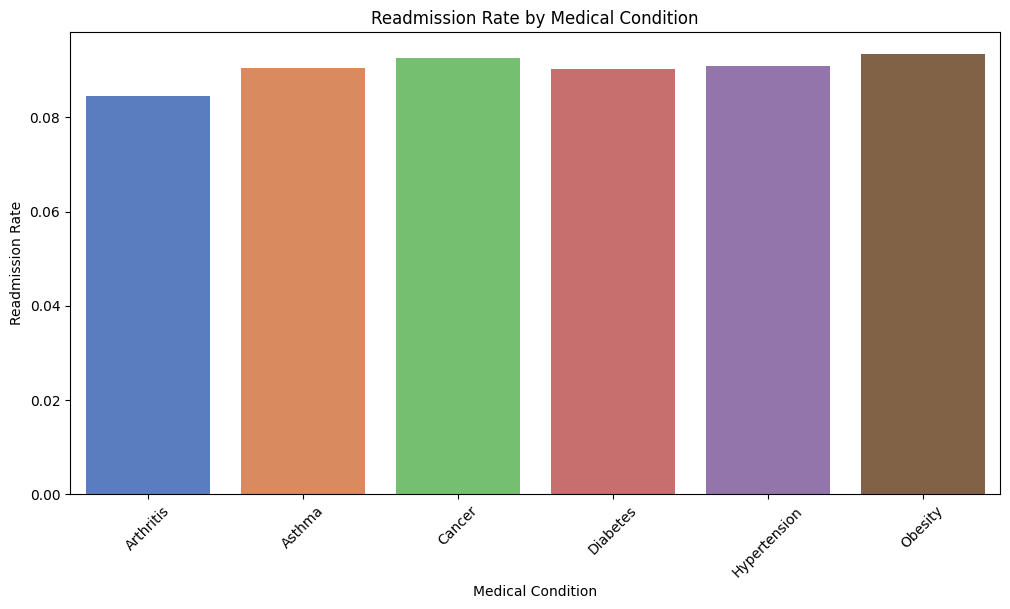

In [34]:
# Calculate the readmission rate by 'Medical Condition'
readmission_rate_condition = data.groupby('Medical Condition')['Readmitted within 30 Days'].mean().reset_index(name='Readmission Rate')
plt.figure(figsize=(12, 6))
sns.barplot(x='Medical Condition', y='Readmission Rate', data=readmission_rate_condition, palette='muted')
plt.title('Readmission Rate by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=45)
plt.show()


In [35]:
le = LabelEncoder()
cat_cols = []
for col in data.columns:
    if data[col].dtypes == "object":
        cat_cols.append(col)
for col in cat_cols:
    data[col] = le.fit_transform(data[col])
data.head()

Name  Age  Gender  Blood Type  Medical Condition Date of Admission  Doctor  \
0     0   22       1           3                  5        2019-07-24   33510   
1     1   76       0           0                  0        2022-03-02   27452   
2     2   20       1           7                  4        2020-10-10    1690   
3     3   69       0           5                  3        2019-10-17   22875   
4     4   18       1           5                  2        2021-01-13   35058   

   Hospital  Insurance Provider  Billing Amount  Room Number  Admission Type  \
0     33230                   4    39906.147308          279               2   
1     25582                   2    10584.185945          187               0   
2      8072                   3    29740.960199          104               2   
3     11674                   0    21535.554758          206               2   
4      8386                   0    13895.551020          260               1   

  Discharge Date  Medication  Test Results  Length of Stay  \
0     2019-08-04           3             0              11   
1     2022-03-15           2             1              13   
2     2020-11-05           3             0              26   
3     2019-10-26           4             0               9   
4     2021-01-20           3             0               7   

   Readmitted within 30 Days  Month  Year  Season  
0                      False      7  2019       2  
1                      False      3  2022       1  
2                      False     10  2020       0  
3                      False     10  2019       0  
4                      False      1  2021       3

In [36]:
# Splitting the data into numerical and categorical
data_cat = data[[col for col in data.columns if data[col].dtype == 'O']]
data_num = data[[col for col in data.columns if data[col].dtype != 'O']]

data_cat.head(), data_num.head()


(Empty DataFrame
 Columns: []
 Index: [0, 1, 2, 3, 4],
    Name  Age  Gender  Blood Type  Medical Condition Date of Admission  Doctor  \
 0     0   22       1           3                  5        2019-07-24   33510   
 1     1   76       0           0                  0        2022-03-02   27452   
 2     2   20       1           7                  4        2020-10-10    1690   
 3     3   69       0           5                  3        2019-10-17   22875   
 4     4   18       1           5                  2        2021-01-13   35058   
 
    Hospital  Insurance Provider  Billing Amount  Room Number  Admission Type  \
 0     33230                   4    39906.147308          279               2   
 1     25582                   2    10584.185945          187               0   
 2      8072                   3    29740.960199          104               2   
 3     11674                   0    21535.554758          206               2   
 4      8386                   0    13895.5510

In [37]:
print(data.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Length of Stay',
       'Readmitted within 30 Days', 'Month', 'Year', 'Season'],
      dtype='object')


In [38]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = data_num.corr()
correlation_matrix

/var/folders/z5/mf0v461d1f578jlw6kng364r0000gn/T/ipykernel_8521/1542254900.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_num.corr()


Name       Age    Gender  Blood Type  \
Name                       1.000000  0.001151  0.007992   -0.001075   
Age                        0.001151  1.000000 -0.002510   -0.000031   
Gender                     0.007992 -0.002510  1.000000   -0.000690   
Blood Type                -0.001075 -0.000031 -0.000690    1.000000   
Medical Condition          0.003250 -0.002800  0.000746   -0.004183   
Doctor                    -0.005099 -0.003225 -0.002916   -0.004764   
Hospital                   0.003629  0.001728  0.003262   -0.000457   
Insurance Provider        -0.001197 -0.005222 -0.003267   -0.001097   
Billing Amount            -0.001584 -0.003427  0.004939   -0.000575   
Room Number               -0.001004 -0.000352 -0.006764    0.004465   
Admission Type             0.004086  0.004098  0.009642   -0.004305   
Medication                 0.000286 -0.006073  0.007855    0.002778   
Test Results               0.005377 -0.006974  0.005073   -0.000717   
Length of Stay             0.001011  0.007890  0.004224   -0.001702   
Readmitted within 30 Days -0.000525 -0.007280  0.002833   -0.002628   
Month                      0.007049 -0.007533  0.002928    0.000205   
Year                       0.002264  0.000603  0.000914   -0.000192   
Season                    -0.003164  0.000289  0.000196   -0.002698   

                           Medical Condition    Doctor  Hospital  \
Name                                0.003250 -0.005099  0.003629   
Age                                -0.002800 -0.003225  0.001728   
Gender                              0.000746 -0.002916  0.003262   
Blood Type                         -0.004183 -0.004764 -0.000457   
Medical Condition                   1.000000 -0.002240 -0.002048   
Doctor                             -0.002240  1.000000 -0.003078   
Hospital                           -0.002048 -0.003078  1.000000   
Insurance Provider                 -0.004689  0.002637 -0.001234   
Billing Amount                      0.005426  0.003093 -0.004035   
Room Number                        -0.004286  0.007921  0.001475   
Admission Type                     -0.001848 -0.005246 -0.002093   
Medication                         -0.003091  0.003923  0.004373   
Test Results                        0.002538  0.000639 -0.004723   
Length of Stay                     -0.006042  0.001271 -0.004095   
Readmitted within 30 Days           0.007382  0.001344  0.001710   
Month                               0.006850  0.006590 -0.005349   
Year                               -0.003040  0.006427  0.003206   
Season                             -0.009744 -0.008649  0.004473   

                           Insurance Provider  Billing Amount  Room Number  \
Name                                -0.001197       -0.001584    -0.001004   
Age                                 -0.005222       -0.003427    -0.000352   
Gender                              -0.003267        0.004939    -0.006764   
Blood Type                          -0.001097       -0.000575     0.004465   
Medical Condition                   -0.004689        0.005426    -0.004286   
Doctor                               0.002637        0.003093     0.007921   
Hospital                            -0.001234       -0.004035     0.001475   
Insurance Provider                   1.000000       -0.002448     0.008992   
Billing Amount                      -0.002448        1.000000    -0.003930   
Room Number                          0.008992       -0.003930     1.000000   
Admission Type                       0.009856       -0.002815    -0.004565   
Medication                          -0.002483       -0.004128     0.003924   
Test Results                        -0.001863       -0.002635     0.002204   
Length of Stay                       0.001736       -0.004891    -0.004540   
Readmitted within 30 Days            0.002809       -0.002438     0.002631   
Month                                0.002615        0.004478     0.002641   
Year                                 0.002563       -0.001760 

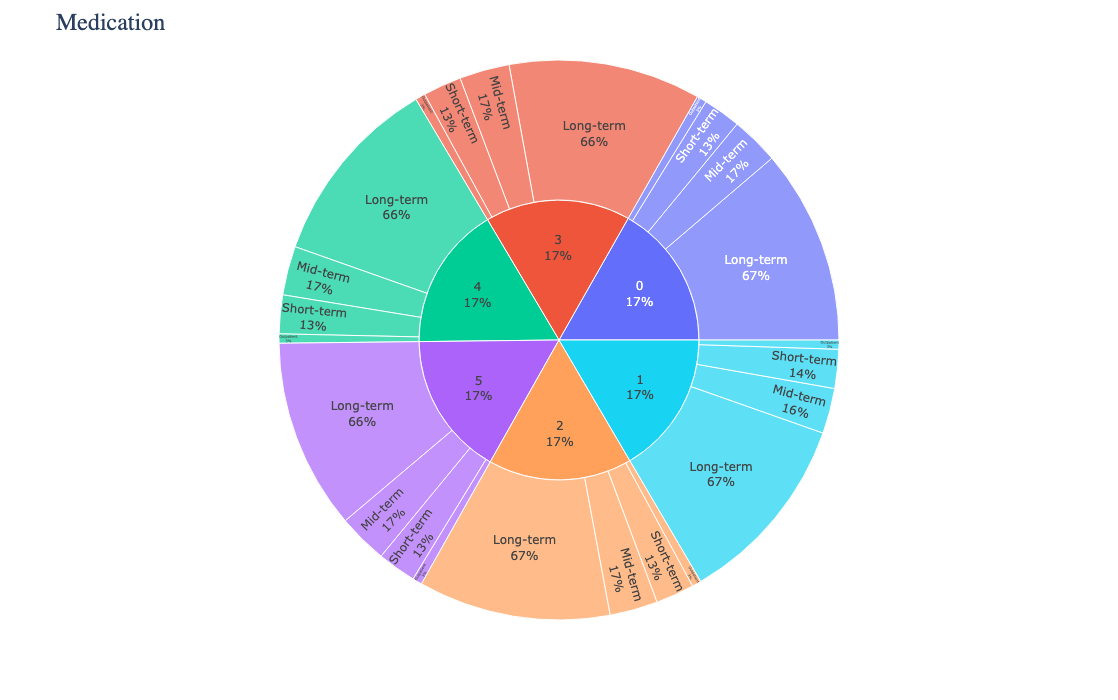

In [39]:
for i in range(len(data)):
    if data.loc[i, 'Length of Stay'] > 10:
        data.loc[i, 'Medication Length'] = 'Long-term'
    elif data.loc[i, 'Length of Stay'] > 5:
        data.loc[i, 'Medication Length'] = 'Mid-term'
    elif data.loc[i, 'Length of Stay'] > 1:
        data.loc[i, 'Medication Length'] = 'Short-term'
    else:
        data.loc[i, 'Medication Length'] = 'Outpatient'

# Create the sunburst chart
fig = px.sunburst(data, path=['Medical Condition', 'Medication Length'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Medication", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=700, 
                  height=700)
fig.show()


## Applying classification algorithms  machine learning models are applied

# Logistic Regression

In [41]:
label_encoder = LabelEncoder()

for column in data.columns:
    if column != 'Age':
        data[column] = label_encoder.fit_transform(data[column])

# Separate features and target variable
X = data.drop('Test Results', axis=1)
y = data['Test Results']


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [43]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [44]:
# Print evaluation metrics
print("-------------------------------------------------------------------------")
print(f"The accuracy score is: ------>>  {accuracy}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{conf_matrix}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n{class_report}")

-------------------------------------------------------------------------
The accuracy score is: ------>>  0.3368101879927229
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[2137 1895 1537]
 [2084 1834 1492]
 [2134 1794 1583]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
              precision    recall  f1-score   support

           0       0.34      0.38      0.36      5569
           1       0.33      0.34      0.34      5410
           2       0.34      0.29      0.31      5511

    accuracy                           0.34     16490
   macro avg       0.34      0.34      0.34     16490
weighted avg       0.34      0.34      0.34     16490



## Grid Search 

In [45]:
# Separate features and target variable
X = data.drop('Test Results', axis=1)
y = data['Test Results']
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestClassifier(random_state=7)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

param_grid = {
    'model__n_estimators': [100],
    'model__max_depth': [10]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

best_model = grid_search.best_estimator_

# Evaluate the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("-------------------------------------------------------------------------")
print(f"The accuracy score is: ------>>  {accuracy}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{conf_matrix}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n{class_report}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
-------------------------------------------------------------------------
The accuracy score is: ------>>  0.37107337780473015
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[2236 1795 1538]
 [1866 2011 1533]
 [1929 1710 1872]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
              precision    recall  f1-score   support

           0       0.37      0.40      0.39      5569
           1       0.36      0.37      0.37      5410
           2       0.38      0.34      0.36      5511

    accuracy                           0.37     16490
   macro avg       0.37      0.37      0.37     16490
weighted avg       0.37      0.37      0.37     16490



## Performing Cross- Validation for better Accuracy

## Random Forest

In [46]:
# Encode categorical columns, excluding 'Age'
for column in data.columns:
    if column != 'Age':
        data[column] = label_encoder.fit_transform(data[column])

print(data.head())
print(data.corr()['Test Results'])

X = data.drop('Test Results', axis=1)
y = data['Test Results']

   Name  Age  Gender  Blood Type  Medical Condition  Date of Admission  \
0     0   22       1           3                  5                 77   
1     1   76       0           0                  0               1029   
2     2   20       1           7                  4                521   
3     3   69       0           5                  3                162   
4     4   18       1           5                  2                616   

   Doctor  Hospital  Insurance Provider  Billing Amount  ...  Admission Type  \
0   33510     33230                   4           39586  ...               2   
1   27452     25582                   2            9800  ...               0   
2    1690      8072                   3           29253  ...               2   
3   22875     11674                   0           20869  ...               2   
4   35058      8386                   0           13163  ...               1   

   Discharge Date  Medication  Test Results  Length of Stay  \
0          

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("-------------------------------------------------------------------------")
print(f"The accuracy score is: ------>>  {accuracy}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{conf_matrix}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n{class_report}")


-------------------------------------------------------------------------
The accuracy score is: ------>>  0.42328684050939963
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[2391 1625 1553]
 [1610 2310 1490]
 [1689 1543 2279]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
              precision    recall  f1-score   support

           0       0.42      0.43      0.42      5569
           1       0.42      0.43      0.42      5410
           2       0.43      0.41      0.42      5511

    accuracy                           0.42     16490
   macro avg       0.42      0.42      0.42     16490
weighted avg       0.42      0.42      0.42     16490



In [48]:
# Separate features and target variable
X = data.drop('Test Results', axis=1)
y = data['Test Results']

# Identify categorical and numerical columns
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestClassifier(random_state=7)

# Create and evaluate the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])
# Simplified hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20]
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X, y)


best_model = grid_search.best_estimator_
# Evaluate the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("-------------------------------------------------------------------------")
print(f"The accuracy score is: ------>>  {accuracy}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{conf_matrix}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n{class_report}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits
-------------------------------------------------------------------------
The accuracy score is: ------>>  0.37107337780473015
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[2236 1795 1538]
 [1866 2011 1533]
 [1929 1710 1872]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
              precision    recall  f1-score   support

           0       0.37      0.40      0.39      5569
           1       0.36      0.37      0.37      5410
           2       0.38      0.34      0.36      5511

    accuracy                           0.37     16490
   macro avg       0.37      0.37      0.37     16490
weighted avg       0.37      0.37      0.37     16490



## Decision tree

In [49]:
X = data.drop('Test Results', axis=1)
y = data['Test Results']
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = DecisionTreeClassifier(random_state=7)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])
param_grid = {
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X, y)
best_model = grid_search.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("-------------------------------------------------------------------------")
print(f"The accuracy score is: ------>>  {accuracy}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{conf_matrix}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n{class_report}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
-------------------------------------------------------------------------
The accuracy score is: ------>>  0.37938144329896906
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[2226 1753 1590]
 [1830 2062 1518]
 [1846 1697 1968]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
              precision    recall  f1-score   support

           0       0.38      0.40      0.39      5569
           1       0.37      0.38      0.38      5410
           2       0.39      0.36      0.37      5511

    accuracy                           0.38     16490
   macro avg       0.38      0.38      0.38     16490
weighted avg       0.38      0.38      0.38     16490



## XGBOOST Cross validation

In [50]:
# XGBoost model
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_accuracy = cross_val_score(xgb_classifier, X_test, y_test, cv=8).mean()
print("XGBoost cross-validation score: ", xgb_accuracy)

XGBoost cross-validation score:  0.3525766439313828


## SVM Cross Validation

In [51]:
#Support Vector Machine
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
svm_accuracy = cross_val_score(svm_classifier, X_test, y_test, cv=8).mean()
print("SVM cross-validation score: ", svm_accuracy)

SVM cross-validation score:  0.3396008607029726


## K-Nearest Neighbors model

In [52]:
# K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier
knn_classifier.fit(X_train, y_train)
knn_accuracy = cross_val_score(knn_classifier, X_test, y_test, cv=8).mean()
print("K-Nearest Neighbors cross-validation score: ", knn_accuracy)

K-Nearest Neighbors cross-validation score:  0.343056184999607


## Gradient Boosting model

In [53]:
# Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
gb_accuracy = cross_val_score(gb_classifier, X_test, y_test, cv=8).mean()
print("Gradient Boosting cross-validation score: ", gb_accuracy)

[CV] END .......model__max_depth=20, model__n_estimators=100; total time=  21.4s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.7s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=10; total time=   1.0s
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=10; total time=   1.0s
[CV] END model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=10; total time=   1.0s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=5; total time=   1.6s
[CV] END model__max_depth=20, model__min_samples_leaf=2, model__min_samples_split=5; total time=   1.6s
[CV] END model__max_depth=20, model__min_samples_leaf=4, model__min_samples_split=5; total time=   1.5s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5; total time=   2.0s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_spli

## Question 1: Readmission in 30 days

In [54]:
# Ensure the date columns are in datetime format
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

# Sort the data by 'Name' and 'Date of Admission'
data = data.sort_values(by=['Name', 'Date of Admission']).reset_index(drop=True)

# Initialize the 'Readmitted within 30 Days' column
data['Readmitted within 30 Days'] = False

# Identify readmissions within 30 days
for i in range(1, len(data)):
    if (data.iloc[i]['Name'] == data.iloc[i - 1]['Name'] and
        (data.iloc[i]['Date of Admission'] - data.iloc[i - 1]['Discharge Date']).days <= 30):
        data.at[i, 'Readmitted within 30 Days'] = True

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Feature engineering: Creating additional features
data['Admission_Year'] = data['Date of Admission'].dt.year
data['Admission_Month'] = data['Date of Admission'].dt.month
data['Admission_Day'] = data['Date of Admission'].dt.day
data['Discharge_Year'] = data['Discharge Date'].dt.year
data['Discharge_Month'] = data['Discharge Date'].dt.month
data['Discharge_Day'] = data['Discharge Date'].dt.day

# Select features and target variable
features = data.drop(columns=['Readmitted within 30 Days', 'Date of Admission', 'Discharge Date', 'Name'])
target = data['Readmitted within 30 Days']


In [55]:
features = data.drop(columns=['Readmitted within 30 Days', 'Date of Admission', 'Discharge Date', 'Name'])
target = data['Readmitted within 30 Days']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_smote, y_train_smote)
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

Accuracy: 0.8382049727107338
Confusion Matrix:
 [[13675  1342]
 [ 1326   147]]
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.91      0.91     15017
        True       0.10      0.10      0.10      1473

    accuracy                           0.84     16490
   macro avg       0.51      0.51      0.51     16490
weighted avg       0.84      0.84      0.84     16490



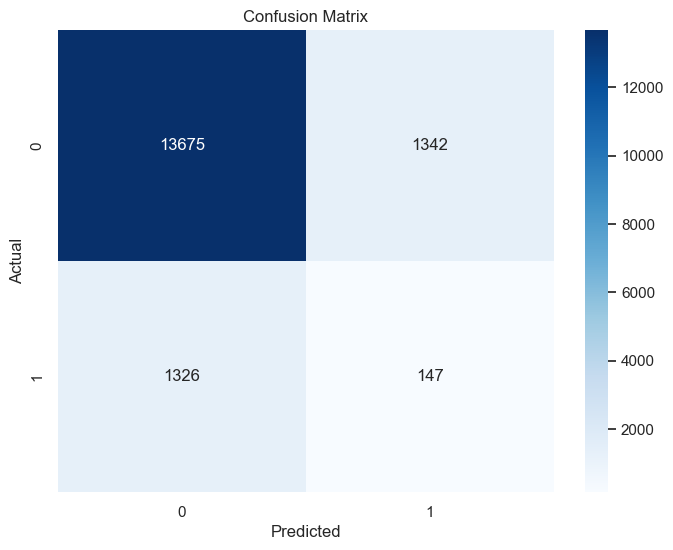

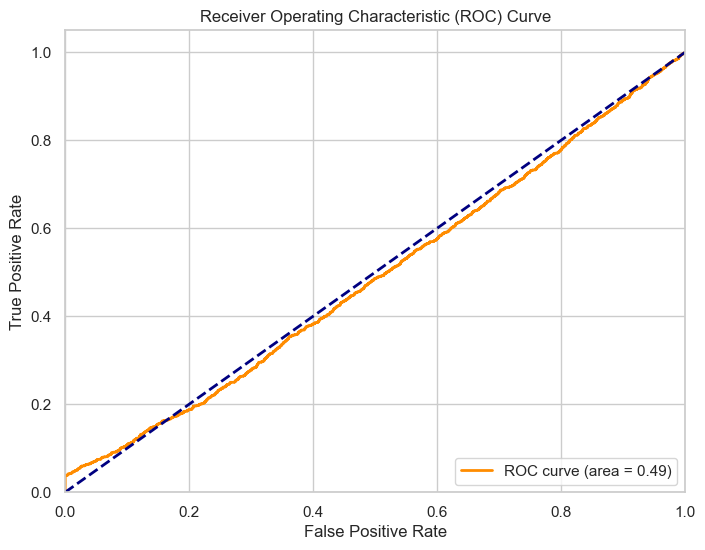

In [56]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
# Plotting the confusion matrix with enhanced style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Question 2: Predict Length of Stay

Mean Squared Error: 2.8734409439744724
R-squared: 0.9614968926045065


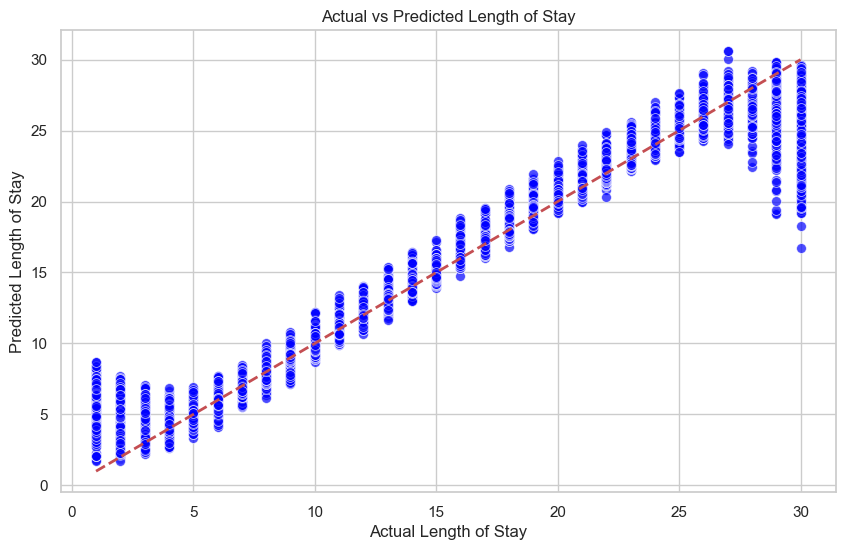

     Length of Stay  Predicted Length of Stay
3                30                 26.813772
9                30                 23.265562
82               30                 26.367235
140              30                 22.713107
141              30                 22.616349
152              30                 23.129366
184              30                 56.813087
203              30                 23.260608
205              30                 22.907785
222              30                 23.081076


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [57]:
features = data.drop(columns=['Length of Stay', 'Date of Admission', 'Discharge Date'])
target = data['Length of Stay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
rf_model = RandomForestRegressor()
gbr_model = GradientBoostingRegressor()
lr_model = LinearRegression()
voting_model = VotingRegressor(estimators=[
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('gbr', gbr_model),
    ('lr', lr_model)
])

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4]
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gbr = GridSearchCV(estimator=gbr_model, param_grid=param_grid_gbr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_gbr.fit(X_train, y_train)

best_xgb = grid_search_xgb.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_gbr = grid_search_gbr.best_estimator_

# Combine the best models in the voting regressor
voting_model = VotingRegressor(estimators=[
    ('xgb', best_xgb),
    ('rf', best_rf),
    ('gbr', best_gbr),
    ('lr', lr_model)
])

# Train the voting model
voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, s=50, color='blue', edgecolor='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Length of Stay')
plt.ylabel('Predicted Length of Stay')
plt.title('Actual vs Predicted Length of Stay')
plt.show()

voting_model.fit(features, target)
top_10_patients = data.nlargest(10, 'Length of Stay')
top_10_features = top_10_patients.drop(columns=['Length of Stay', 'Date of Admission', 'Discharge Date'])
top_10_features = scaler.transform(top_10_features)
top_10_predictions = voting_model.predict(top_10_features)
results = top_10_patients[['Length of Stay']].copy()
results['Predicted Length of Stay'] = top_10_predictions
print(results)


## Question 3: Estimate Cost of Hospitalization

Mean Squared Error: 183049716.03646454
R-squared: 0.08280162474249342


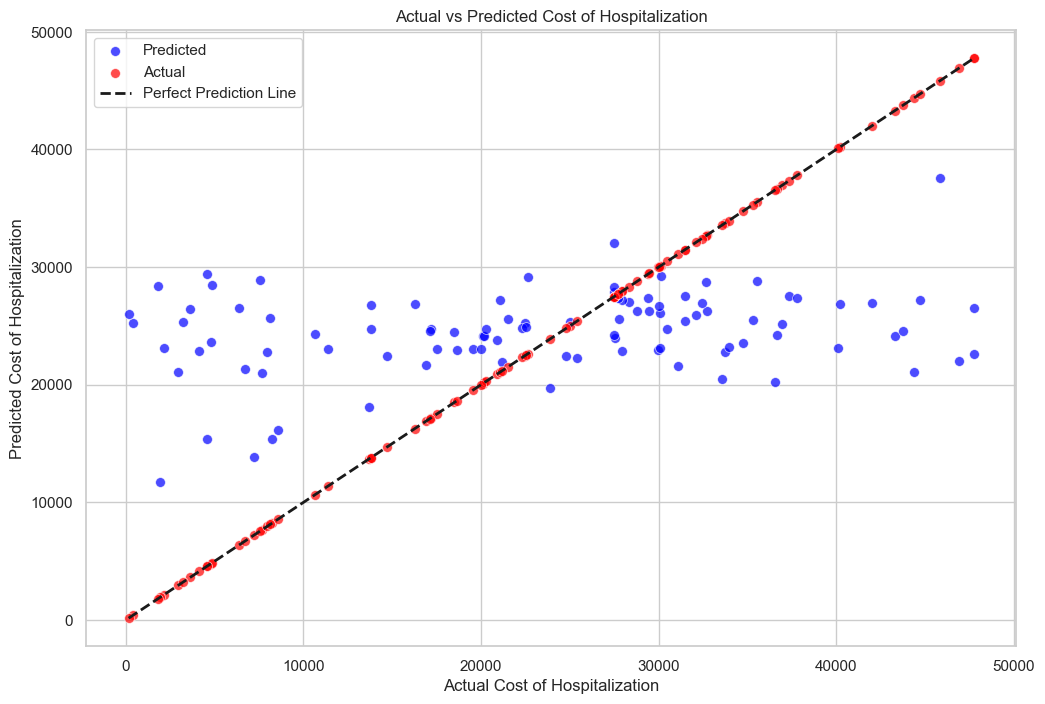

In [58]:
target_column = 'Billing Amount'

if target_column not in data.columns:
    raise KeyError(f"'{target_column}' column not found in the dataset. Please check the column name.")
features = data.drop(columns=[target_column, 'Date of Admission', 'Discharge Date', 'Name', 'Room Number'])
target = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

sample_size = 100
sample_indices = X_test[:sample_size]

y_test_sample = y_test[:sample_size]
y_pred_sample = y_pred[:sample_size]
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test_sample, y=y_pred_sample, s=50, color='blue', edgecolor='w', alpha=0.7, label='Predicted')
sns.scatterplot(x=y_test_sample, y=y_test_sample, s=50, color='red', edgecolor='w', alpha=0.7, label='Actual')
plt.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Cost of Hospitalization')
plt.ylabel('Predicted Cost of Hospitalization')
plt.title('Actual vs Predicted Cost of Hospitalization')
plt.legend()
plt.show()